In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv(r"Trainset.csv", encoding='latin 1') 

In [40]:
stopword = set("of the a is and & are for were was at you u he she in this so not just on but as it will or if that hi her his her had".split())
print(stopword)

{'and', 'but', 'a', 'hi', 'were', 'are', 'his', '&', 'her', 'she', 'or', 'in', 'the', 'if', 'just', 'so', 'of', 'will', 'had', 'this', 'not', 'it', 'he', 'for', 'that', 'you', 'on', 'is', 'u', 'was', 'as', 'at'}


In [41]:
df['review'] = df.review.str.replace("[^\w\s]", "").str.lower()

df['review'] = df['review'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopword]))

In [42]:
df = df.drop(columns="id")

In [43]:
df.head()

,rating,review
0,poor,treats students like theyre kids very disrespe...
1,awesome,i have graduated from uoft over year ago still...
2,good,may use big words all time gets point across e...
3,good,dr molumby one those professors ether loved ha...
4,awesome,shes little stress because class load however ...


In [44]:
ratings = df["rating"]
reviews = df["review"]

In [45]:
uniquerate = df["rating"].unique()

In [46]:
print(uniquerate)

['poor' 'awesome' 'good' 'average' 'awful']


In [47]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from keras.preprocessing import text, sequence


from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    #text = re.sub('\W', ' ', text)
    #text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [49]:
rateplot = []
rate = pd.DataFrame()
rate['review'] = rateplot
rateplot = rate['review'].apply(clean_text)

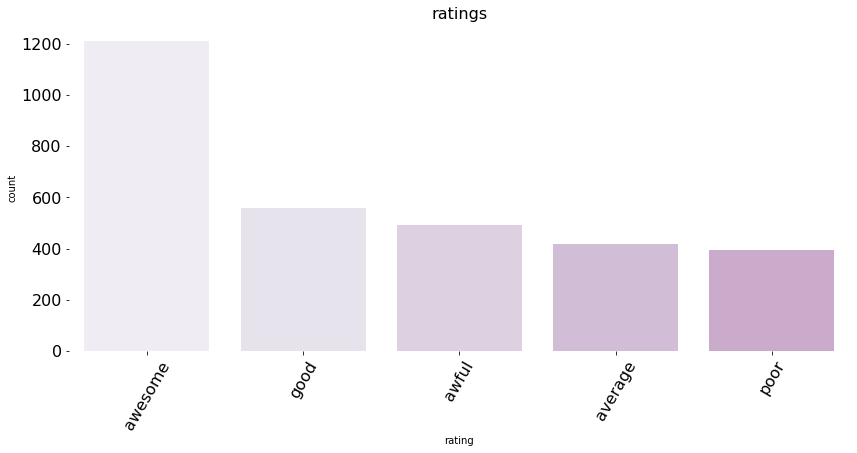

In [12]:
plt.figure(figsize=(14,6))
plt.title('ratings',fontsize=16)
plt.xlabel('rating')

sns.countplot(df.rating,order=pd.value_counts(df.rating).iloc[:15].index,palette=sns.color_palette("PuRd", 15))

plt.xticks(size=16,rotation=60)
plt.yticks(size=16)
sns.despine(bottom=True, left=True)
plt.show()

In [50]:
cnt_vectorizer = CountVectorizer(ngram_range=(1,2),max_features =8667) 
cnt_vectorizer = cnt_vectorizer.fit(reviews)
features = cnt_vectorizer.transform(reviews)
features_nd = features.toarray()
features_nd.shape

(3079, 8667)

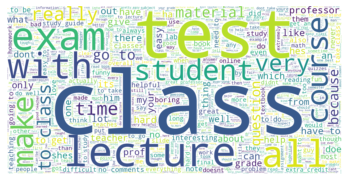

<Figure size 1080x1080 with 0 Axes>

In [14]:
text = df["review"].str.cat(sep='. ')
stopwords = set(stopword)
wc = WordCloud(max_words=2000, stopwords=stopwords,width=1600, height=800, background_color="white", contour_color="white")
wc.generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(15,15))
plt.show()


In [19]:
km = KMeans(n_clusters=3)
km.fit(features_nd)
new_labels = km.labels_


In [51]:
encoder = preprocessing.LabelEncoder()
encoder = encoder.fit(ratings)
labels = encoder.transform(ratings)

In [52]:
X_train, X_test, y_train, y_test  = train_test_split(features_nd, labels, train_size=0.90, test_size=0.10,random_state=1234)

In [17]:
# y_train = encoder.fit_transform(y_train)
# y_test = encoder.fit_transform(y_test)

In [53]:
y_train[0:6]

array([1, 2, 0, 1, 2, 1])

In [54]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
accuracy_score(y_test,nb_pred)

0.5681818181818182

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
accuracy_score(y_test,dt_pred)

0.4675324675324675

In [57]:
gb = GradientBoostingClassifier(n_estimators=15, learning_rate = 0.25)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
accuracy_score(y_test, gb_pred)

0.5064935064935064

In [55]:
ab = AdaBoostClassifier(n_estimators=50, learning_rate = 0.25)
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)
accuracy_score(y_test, ab_pred)

0.487012987012987

In [56]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
accuracy_score(y_test,gnb_pred)

0.4253246753246753

In [26]:
testdata = pd.read_csv(r"Testset without answer.csv", encoding='latin 1')
reviewsTest = testdata["review"]
idTest = testdata["id"]

In [27]:
y_train = encoder.transform(ratings)


In [28]:
dt.fit(features_nd, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
features = cnt_vectorizer.transform(reviewsTest)
features_nd = features.toarray()
features_nd.shape

(1320, 8667)

In [31]:
dt_pred =dt.predict(features_nd)

In [32]:
resultRatings = encoder.inverse_transform(dt_pred)

In [33]:
df1 = pd.DataFrame(columns = ['id', 'rating']) 
type(idTest)

pandas.core.series.Series

In [34]:
df1['id'] = idTest.tolist()
df1['rating'] = resultRatings

In [35]:
df1.to_csv("Prediction5.csv",index=False)